In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns4
import warnings
warnings.filterwarnings('ignore')

In [2]:
market_caps = pd.read_csv("../data/stock_mktcaps.csv")

In [3]:
missing = market_caps.isna().sum()
for i in missing.index:    
    if missing[i] >= 1:
        market_caps = market_caps.drop(columns=[i])

In [4]:
market_caps["date"] = pd.to_datetime(market_caps['date'])

market_caps = market_caps.set_index("date")


In [5]:
market_caps

,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,687286,936980,361367,152198,871347,362603,502585,152288,779661,317449
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,2658.66,547.34,674.37,20901.61,392.39,268.07,1983.24,2784.07,483.04,1585.67,...,155.26,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2835.91,1195.35
2003-01-03,2679.51,547.34,674.37,21305.57,388.42,268.07,1937.44,2858.64,483.04,1609.16,...,161.01,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2855.47,1195.35
2003-01-06,2669.09,547.34,674.37,21729.07,388.42,270.19,1937.44,2982.93,483.04,1609.16,...,155.26,2240.00,16.35,18.71,53.90,240.75,20.54,14.10,2865.25,1195.35
2003-01-07,2658.66,547.34,668.55,23129.91,388.42,270.19,1937.44,3082.36,483.04,1585.67,...,149.51,2240.00,19.32,18.71,53.90,240.75,20.54,14.10,2884.80,1195.35
2003-01-08,2658.66,547.34,668.55,22308.95,388.42,270.19,1937.44,3057.51,483.04,1550.43,...,143.76,2240.00,19.32,18.71,53.90,240.75,20.65,14.10,2894.58,1157.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,10915.28,86.36,760.07,113598.50,13739.52,659.73,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1680.98,132.46,2873.02,1431.21,622.73,2599.43,37927.40,21410.80
2021-06-25,10884.50,86.36,760.07,114861.70,13739.52,661.93,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1715.28,132.46,2873.02,1374.83,622.73,2530.42,37405.35,21212.56
2021-06-28,10736.07,86.36,760.07,111606.30,13739.52,625.64,2658.56,556.53,545.55,2607.55,...,130.03,44604.41,1654.02,132.46,2873.02,1379.17,622.73,2530.42,37146.55,21225.77


In [6]:
#use Oyuka's filtering here
filtered_market_cap = market_caps["2003-01-02":"2021-06-30"]

In [7]:
filtered_market_cap = filtered_market_cap.agg(np.mean).to_frame().reset_index()

In [8]:
filtered_market_cap = filtered_market_cap.rename(columns={"index":"stock", 0:"avg market cap"})


In [9]:
from sklearn.cluster import KMeans

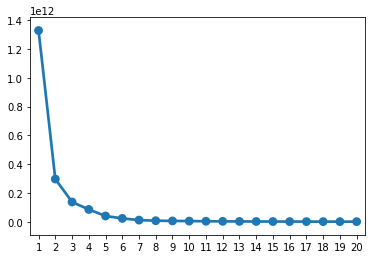

In [10]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(filtered_market_cap[["avg market cap"]])
    inertia.append(estimator.inertia_)
    
sns.pointplot(np.arange(1,21), inertia)

In [11]:
km = KMeans(n_clusters=5)
km.fit(filtered_market_cap[["avg market cap"]])

KMeans(n_clusters=5)

In [12]:
clusters = pd.DataFrame(km.cluster_centers_, columns=["avg market cap"], index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5'])

In [13]:
filtered_market_cap['Cluster'] = km.labels_ + 1
filtered_market_cap["Cluster"].unique()

array([1, 4, 3, 5, 2])

In [14]:
filtered_market_cap

,stock,avg market cap,Cluster
0,930060,9644.891265,1
1,699903,245.113918,1
2,879841,757.682350,1
3,314909,96858.343673,4
4,15362F,7691.867893,1
...,...,...,...
219,362603,1000.644530,1
220,502585,736.351823,1
221,152288,1295.501050,1
222,779661,18738.034564,1


In [15]:
print("Min/Max for Cluster 1")
print(filtered_market_cap[filtered_market_cap["Cluster"] == 1]["avg market cap"].min())
print(filtered_market_cap[filtered_market_cap["Cluster"] == 1]["avg market cap"].max())
print()
print("Min/Max for Cluster 2")
print(filtered_market_cap[filtered_market_cap["Cluster"] == 2]["avg market cap"].min())
print(filtered_market_cap[filtered_market_cap["Cluster"] == 2]["avg market cap"].max())
print()
print("Min/Max for Cluster 3")
print(filtered_market_cap[filtered_market_cap["Cluster"] == 3]["avg market cap"].min())
print(filtered_market_cap[filtered_market_cap["Cluster"] == 3]["avg market cap"].max())
print()
print("Min/Max for Cluster 4")
print(filtered_market_cap[filtered_market_cap["Cluster"] == 4]["avg market cap"].min())
print(filtered_market_cap[filtered_market_cap["Cluster"] == 4]["avg market cap"].max())
print()
print("Min/Max for Cluster 5")
print(filtered_market_cap[filtered_market_cap["Cluster"] == 5]["avg market cap"].min())
print(filtered_market_cap[filtered_market_cap["Cluster"] == 5]["avg market cap"].max())


Min/Max for Cluster 1
116.44643470792646
27797.389448024085

Min/Max for Cluster 2
679367.7194523191
679367.7194523191

Min/Max for Cluster 3
150976.6332152058
206538.66515248962

Min/Max for Cluster 4
36671.71531786936
108784.6555884882

Min/Max for Cluster 5
342920.9447272322
498486.96568728494


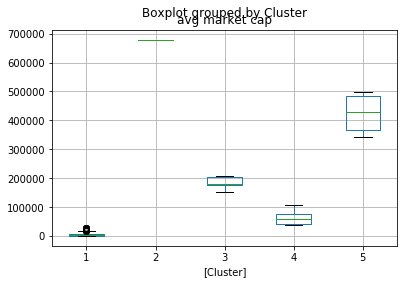

In [16]:
filtered_market_cap.boxplot(by="Cluster")

In [25]:
filtered_market_cap[filtered_market_cap["Cluster"] == 1]

,stock,avg market cap,Cluster
0,930060,9644.891265,1
1,699903,245.113918,1
2,879841,757.682350,1
4,15362F,7691.867893,1
5,315452,1662.753565,1
...,...,...,...
219,362603,1000.644530,1
220,502585,736.351823,1
221,152288,1295.501050,1
222,779661,18738.034564,1


In [18]:
filtered_market_cap[filtered_market_cap["Cluster"] == 2]

,stock,avg market cap,Cluster
134,923808,679367.719452,2


In [19]:
filtered_market_cap[filtered_market_cap["Cluster"] == 3]

,stock,avg market cap,Cluster
18,930523,150976.633215,3
64,776872,180657.995243,3
90,871044,206538.665152,3
140,982545,205507.548157,3
145,950918,175309.406256,3


In [23]:
filtered_market_cap[filtered_market_cap["Cluster"] == 4]

,stock,avg market cap,Cluster
3,314909,96858.343673,4
20,930529,86468.035449,4
26,317439,61523.961544,4
36,950506,54496.035309,4
58,277122,44706.835198,4
67,930106,61070.869517,4
79,916481,78419.223518,4
81,26040Q,36671.715318,4
87,14801U,38620.407837,4
89,699938,42416.983842,4


In [21]:
filtered_market_cap[filtered_market_cap["Cluster"] == 5]

,stock,avg market cap,Cluster
19,923904,375329.923196,5
31,895185,480440.858520,5
50,540852,342920.944727,5
102,152214,498486.965687,5
